In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/haram4th/ADsP/main/wine.csv", header=None)
data

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


1. Alcohol
2. Malic acid
3. Ash
4. Alcalinity of ash
5. Magnesium
6. Total phenols
7. Flavanoids
8. Nonflavanoid phenols
9. Proanthocyanins
10.Color intensity
11.Hue
12.OD280/OD315 of diluted wines
13.Proline

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       6497 non-null   float64
 1   1       6497 non-null   float64
 2   2       6497 non-null   float64
 3   3       6497 non-null   float64
 4   4       6497 non-null   float64
 5   5       6497 non-null   float64
 6   6       6497 non-null   float64
 7   7       6497 non-null   float64
 8   8       6497 non-null   float64
 9   9       6497 non-null   float64
 10  10      6497 non-null   float64
 11  11      6497 non-null   int64  
 12  12      6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


<Axes: >

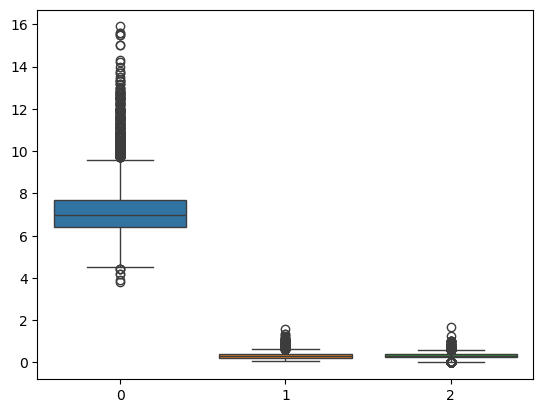

In [5]:
sns.boxplot(data.iloc[:,0:3])

In [6]:
data[12].value_counts()

12
0    4898
1    1599
Name: count, dtype: int64

In [7]:
X = data.drop(12, axis=1)
y = data[12]

In [8]:
from sklearn.preprocessing import RobustScaler

In [9]:
rs = RobustScaler()
X_scaled = rs.fit_transform(X)
X_scaled

array([[ 0.30769231,  2.41176471, -2.21428571, ...,  0.29411765,
        -0.5       , -1.        ],
       [ 0.61538462,  3.47058824, -2.21428571, ...,  1.        ,
        -0.27777778, -1.        ],
       [ 0.61538462,  2.76470588, -1.92857143, ...,  0.82352941,
        -0.27777778, -1.        ],
       ...,
       [-0.38461538, -0.29411765, -0.85714286, ..., -0.29411765,
        -0.5       ,  0.        ],
       [-1.15384615,  0.        , -0.07142857, ..., -0.76470588,
         1.38888889,  1.        ],
       [-0.76923077, -0.47058824,  0.5       , ..., -1.11764706,
         0.83333333,  0.        ]])

In [10]:
y

0       1
1       1
2       1
3       1
4       1
       ..
6492    0
6493    0
6494    0
6495    0
6496    0
Name: 12, Length: 6497, dtype: int64

In [11]:
from sklearn.model_selection import train_test_split


In [12]:
X_train, X_valid, y_train, y_valid = train_test_split(X_scaled, y ,test_size=0.4 , stratify=y,random_state=10)
X_valid, X_test, y_valid, y_test = train_test_split(X_valid, y_valid, test_size=0.5,stratify=y_valid, random_state=10)

In [13]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input
from sklearn.metrics import classification_report

2024-09-11 09:08:32.071152: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-11 09:08:34.925117: I tensorflow/c/logging.cc:34] Successfully opened dynamic library libdirectml.d6f03b303ac3c4f2eeb8ca631688c9757b361310.so
2024-09-11 09:08:34.925277: I tensorflow/c/logging.cc:34] Successfully opened dynamic library libdxcore.so
2024-09-11 09:08:34.929563: I tensorflow/c/logging.cc:34] Successfully opened dynamic library libd3d12.so
2024-09-11 09:08:35.148798: I tensorflow/c/logging.cc:34] DirectML device enumeration: found 1 compatible adapters.


In [17]:
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                416       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,089
Trainable params: 1,089
Non-trainable params: 0
_________________________________________________________________


2024-09-11 09:12:25.020101: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-11 09:12:25.022264: I tensorflow/c/logging.cc:34] DirectML: creating device on adapter 0 (AMD Radeon(TM) Graphics)
2024-09-11 09:12:25.104741: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-11 09:12:25.104796: W tensorflow/core/common_runtime/pluggable_device/pluggable_device_bfc_allocator.cc:28] Overriding allow_growth setting because force_memory_growth was requested by the device.
2024-09-11 09:12:25.104820: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_f

In [18]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=100, batch_size=500, validation_data=(X_valid,y_valid))

Epoch 1/100
7/8 [=========================>....] - ETA: 0s - loss: 0.6751 - accuracy: 0.6551

2024-09-11 09:12:28.091228: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-11 09:12:28.161626: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-11 09:12:28.161699: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 14845 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


8/8 [==============================] - 1s 35ms/step - loss: 0.6730 - accuracy: 0.6621 - val_loss: 0.6483 - val_accuracy: 0.7421
Epoch 2/100
8/8 [==============================] - 0s 16ms/step - loss: 0.6336 - accuracy: 0.7878 - val_loss: 0.6102 - val_accuracy: 0.8391
Epoch 3/100
1/8 [==>...........................] - ETA: 0s - loss: 0.6089 - accuracy: 0.8540

2024-09-11 09:12:28.428279: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-11 09:12:28.453219: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-11 09:12:28.453281: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 14845 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


8/8 [==============================] - 0s 15ms/step - loss: 0.5925 - accuracy: 0.8774 - val_loss: 0.5643 - val_accuracy: 0.9338
Epoch 4/100
8/8 [==============================] - 0s 15ms/step - loss: 0.5420 - accuracy: 0.9441 - val_loss: 0.5093 - val_accuracy: 0.9584
Epoch 5/100
8/8 [==============================] - 0s 15ms/step - loss: 0.4827 - accuracy: 0.9664 - val_loss: 0.4475 - val_accuracy: 0.9677
Epoch 6/100
8/8 [==============================] - 0s 16ms/step - loss: 0.4196 - accuracy: 0.9779 - val_loss: 0.3875 - val_accuracy: 0.9746
Epoch 7/100
8/8 [==============================] - 0s 14ms/step - loss: 0.3595 - accuracy: 0.9828 - val_loss: 0.3315 - val_accuracy: 0.9761
Epoch 8/100
8/8 [==============================] - 0s 14ms/step - loss: 0.3036 - accuracy: 0.9831 - val_loss: 0.2799 - val_accuracy: 0.9784
Epoch 9/100
8/8 [==============================] - 0s 15ms/step - loss: 0.2528 - accuracy: 0.9846 - val_loss: 0.2340 - val_accuracy: 0.9823
Epoch 10/100
8/8 [==============

8/8 [==============================] - 0s 14ms/step - loss: 0.0172 - accuracy: 0.9967 - val_loss: 0.0315 - val_accuracy: 0.9954
Epoch 62/100
8/8 [==============================] - 0s 13ms/step - loss: 0.0170 - accuracy: 0.9967 - val_loss: 0.0315 - val_accuracy: 0.9954
Epoch 63/100
8/8 [==============================] - 0s 14ms/step - loss: 0.0168 - accuracy: 0.9967 - val_loss: 0.0314 - val_accuracy: 0.9954
Epoch 64/100
8/8 [==============================] - 0s 14ms/step - loss: 0.0166 - accuracy: 0.9967 - val_loss: 0.0315 - val_accuracy: 0.9954
Epoch 65/100
8/8 [==============================] - 0s 13ms/step - loss: 0.0164 - accuracy: 0.9967 - val_loss: 0.0313 - val_accuracy: 0.9954
Epoch 66/100
8/8 [==============================] - 0s 14ms/step - loss: 0.0162 - accuracy: 0.9967 - val_loss: 0.0311 - val_accuracy: 0.9954
Epoch 67/100
8/8 [==============================] - 0s 14ms/step - loss: 0.0160 - accuracy: 0.9967 - val_loss: 0.0309 - val_accuracy: 0.9954
Epoch 68/100
8/8 [========

In [19]:
pred = model.predict(X_test)
pred = pd.DataFrame(pred)
pred = pred[0].apply(lambda x: 1 if x> 0.5 else 0)
print(classification_report(y_test, pred))

41/41 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       1.00      0.98      0.99       320

    accuracy                           1.00      1300
   macro avg       1.00      0.99      0.99      1300
weighted avg       1.00      1.00      1.00      1300



2024-09-11 09:12:41.322621: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-11 09:12:41.448316: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-11 09:12:41.448403: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 14845 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)
2024-09-11 09:12:41.469784: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-11 09:12:41.469848: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_f

In [20]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

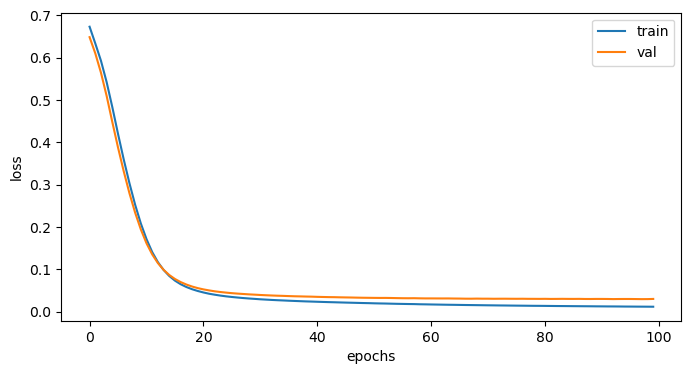

In [21]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

# EarlyStopping으로 학습 조기 중단 및 저장하기

In [22]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


In [23]:
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=20)

# ModelCheckpoint
* 모델을 중간에 저장하는 옵션 

In [32]:
import os
if not os.path.exists("./model"):
    os.makedirs("./model")
    print(f"Directory /model created.")
else:
    print(f"Directory /model already exists.")

Directory /model created.


In [33]:
modelpath = "./model/{epoch:03d}--{val_loss:.4f}.keras"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=0, save_best_only=True)

In [35]:
history = model.fit(X_train, y_train, epochs=1000, batch_size=500, validation_data=(X_valid,y_valid),
                   callbacks=[early_stopping_callback, checkpointer])

Epoch 1/1000
8/8 [==============================] - 0s 29ms/step - loss: 0.0102 - accuracy: 0.9982 - val_loss: 0.0308 - val_accuracy: 0.9946
Epoch 2/1000
8/8 [==============================] - 0s 24ms/step - loss: 0.0101 - accuracy: 0.9985 - val_loss: 0.0308 - val_accuracy: 0.9946
Epoch 3/1000
8/8 [==============================] - 0s 24ms/step - loss: 0.0101 - accuracy: 0.9985 - val_loss: 0.0305 - val_accuracy: 0.9946
Epoch 4/1000
8/8 [==============================] - 0s 16ms/step - loss: 0.0100 - accuracy: 0.9985 - val_loss: 0.0306 - val_accuracy: 0.9946
Epoch 5/1000
8/8 [==============================] - 0s 16ms/step - loss: 0.0099 - accuracy: 0.9985 - val_loss: 0.0309 - val_accuracy: 0.9946
Epoch 6/1000
8/8 [==============================] - 0s 17ms/step - loss: 0.0098 - accuracy: 0.9985 - val_loss: 0.0307 - val_accuracy: 0.9946
Epoch 7/1000
8/8 [==============================] - 0s 18ms/step - loss: 0.0097 - accuracy: 0.9985 - val_loss: 0.0308 - val_accuracy: 0.9946
Epoch 8/1000


# 저장된 베스트 모델을 불러와서 테스트 하기

In [36]:
from tensorflow.keras.models import load_model

In [37]:
best_model = load_model("./model/008--0.0305.keras")

In [38]:
best_pred = best_model.predict(X_test)
best_pred = pd.DataFrame(best_pred)
best_pred = best_pred[0].apply(lambda x: 1 if x>0.5 else 0)
print(classification_report(y_test,best_pred))

41/41 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       1.00      0.99      0.99       320

    accuracy                           1.00      1300
   macro avg       1.00      0.99      1.00      1300
weighted avg       1.00      1.00      1.00      1300



2024-09-10 11:31:52.480387: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


# 다중분류 와인

In [94]:
wine = pd.read_csv("../06machine_learning/data/winequality-white.csv", sep=";")
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [78]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [95]:
wine['quality'].value_counts()

quality
6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: count, dtype: int64

In [96]:
X = wine.drop('quality', axis=1)
y = wine['quality'].copy()
y2 = wine['quality'].copy()


In [97]:
y.head()

0    6
1    6
2    6
3    6
4    6
Name: quality, dtype: int64

In [81]:
from sklearn.preprocessing import RobustScaler

In [98]:
rbs = RobustScaler()
X_scaled = rbs.fit_transform(X)
X_scaled

array([[ 0.2       ,  0.09090909,  0.33333333, ..., -0.94736842,
        -0.14285714, -0.84210526],
       [-0.5       ,  0.36363636,  0.16666667, ...,  0.63157895,
         0.14285714, -0.47368421],
       [ 1.3       ,  0.18181818,  0.66666667, ...,  0.42105263,
        -0.21428571, -0.15789474],
       ...,
       [-0.3       , -0.18181818, -1.08333333, ..., -1.        ,
        -0.07142857, -0.52631579],
       [-1.3       ,  0.27272727, -0.16666667, ...,  0.84210526,
        -0.64285714,  1.26315789],
       [-0.8       , -0.45454545,  0.5       , ...,  0.42105263,
        -1.07142857,  0.73684211]])

In [99]:
y = pd.get_dummies(y)
y

,3,4,5,6,7,8,9
0,False,False,False,True,False,False,False
1,False,False,False,True,False,False,False
2,False,False,False,True,False,False,False
3,False,False,False,True,False,False,False
4,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...
4893,False,False,False,True,False,False,False
4894,False,False,True,False,False,False,False
4895,False,False,False,True,False,False,False
4896,False,False,False,False,True,False,False


In [101]:
from sklearn.model_selection import train_test_split


In [102]:
X_train, X_valid, y_train, y_valid = train_test_split(X_scaled, y ,test_size=0.4 , stratify=y,random_state=10)
X_valid, X_test, y_valid, y_test = train_test_split(X_valid, y_valid, test_size=0.5,stratify=y_valid, random_state=10)

In [106]:
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import classification_report

In [104]:
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(7, activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 32)                384       
                                                                 
 dense_17 (Dense)            (None, 64)                2112      
                                                                 
 dense_18 (Dense)            (None, 32)                2080      
                                                                 
 dense_19 (Dense)            (None, 16)                528       
                                                                 
 dense_20 (Dense)            (None, 7)                 119       
                                                                 
Total params: 5,223
Trainable params: 5,223
Non-trainable params: 0
_________________________________________________________________


In [105]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
early_stop = EarlyStopping(patience=100)
filepath="/model/white_wine{epoch:04d}__{val_loss:.4f}.keras"
model_save = ModelCheckpoint(filepath=filepath, save_best_only=True)
history = model.fit(X_train, y_train, epochs=10000, batch_size=500, validation_data=(X_valid,y_valid), 
                    callbacks=[early_stop,model_save])


Epoch 1/10000
1/6 [====>.........................] - ETA: 2s - loss: 2.0112 - accuracy: 0.0940

2024-09-10 14:21:51.031377: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-10 14:21:51.088249: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-10 14:21:51.088311: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 14845 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


6/6 [==============================] - 1s 56ms/step - loss: 1.9776 - accuracy: 0.1304 - val_loss: 1.9364 - val_accuracy: 0.1867
Epoch 2/10000
6/6 [==============================] - ETA: 0s - loss: 1.9185 - accuracy: 0.2127

2024-09-10 14:21:51.328778: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-10 14:21:51.356697: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-10 14:21:51.356762: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 14845 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


6/6 [==============================] - 0s 34ms/step - loss: 1.9185 - accuracy: 0.2127 - val_loss: 1.8962 - val_accuracy: 0.2286
Epoch 3/10000
6/6 [==============================] - 0s 31ms/step - loss: 1.8760 - accuracy: 0.2594 - val_loss: 1.8539 - val_accuracy: 0.2245
Epoch 4/10000
6/6 [==============================] - 0s 32ms/step - loss: 1.8235 - accuracy: 0.2914 - val_loss: 1.7942 - val_accuracy: 0.2857
Epoch 5/10000
6/6 [==============================] - 0s 26ms/step - loss: 1.7478 - accuracy: 0.3468 - val_loss: 1.7022 - val_accuracy: 0.3847
Epoch 6/10000
6/6 [==============================] - 0s 31ms/step - loss: 1.6332 - accuracy: 0.4551 - val_loss: 1.5697 - val_accuracy: 0.4643
Epoch 7/10000
6/6 [==============================] - 0s 40ms/step - loss: 1.4992 - accuracy: 0.4942 - val_loss: 1.4557 - val_accuracy: 0.4816
Epoch 8/10000
6/6 [==============================] - 0s 32ms/step - loss: 1.3952 - accuracy: 0.5000 - val_loss: 1.3875 - val_accuracy: 0.4786
Epoch 9/10000
6/6 [=

6/6 [==============================] - 0s 18ms/step - loss: 0.7860 - accuracy: 0.6865 - val_loss: 1.0484 - val_accuracy: 0.5592
Epoch 117/10000
6/6 [==============================] - 0s 18ms/step - loss: 0.7855 - accuracy: 0.6886 - val_loss: 1.0571 - val_accuracy: 0.5633
Epoch 118/10000
6/6 [==============================] - 0s 21ms/step - loss: 0.7852 - accuracy: 0.6886 - val_loss: 1.0560 - val_accuracy: 0.5622
Epoch 119/10000
6/6 [==============================] - 0s 22ms/step - loss: 0.7815 - accuracy: 0.6882 - val_loss: 1.0589 - val_accuracy: 0.5622
Epoch 120/10000
6/6 [==============================] - 0s 20ms/step - loss: 0.7783 - accuracy: 0.6903 - val_loss: 1.0555 - val_accuracy: 0.5551
Epoch 121/10000
6/6 [==============================] - 0s 21ms/step - loss: 0.7752 - accuracy: 0.6916 - val_loss: 1.0575 - val_accuracy: 0.5653
Epoch 122/10000
6/6 [==============================] - 0s 18ms/step - loss: 0.7717 - accuracy: 0.7001 - val_loss: 1.0635 - val_accuracy: 0.5612
Epoch 12

6/6 [==============================] - 0s 18ms/step - loss: 0.6811 - accuracy: 0.7369 - val_loss: 1.1328 - val_accuracy: 0.5724
Epoch 174/10000
6/6 [==============================] - 0s 18ms/step - loss: 0.6723 - accuracy: 0.7485 - val_loss: 1.1204 - val_accuracy: 0.5643
Epoch 175/10000
6/6 [==============================] - 0s 17ms/step - loss: 0.6689 - accuracy: 0.7488 - val_loss: 1.1302 - val_accuracy: 0.5745
Epoch 176/10000
6/6 [==============================] - 0s 18ms/step - loss: 0.6679 - accuracy: 0.7491 - val_loss: 1.1484 - val_accuracy: 0.5714
Epoch 177/10000
6/6 [==============================] - 0s 16ms/step - loss: 0.6685 - accuracy: 0.7509 - val_loss: 1.1336 - val_accuracy: 0.5704
Epoch 178/10000
6/6 [==============================] - 0s 18ms/step - loss: 0.6662 - accuracy: 0.7440 - val_loss: 1.1351 - val_accuracy: 0.5673
Epoch 179/10000
6/6 [==============================] - 0s 16ms/step - loss: 0.6629 - accuracy: 0.7515 - val_loss: 1.1296 - val_accuracy: 0.5684
Epoch 18

In [112]:
wine_best_model = load_model("./model/white_wine0088__1.0355.keras")
wine_pred = wine_best_model.predict(X_test)
wine_pred = pd.DataFrame(wine_pred,columns=y.columns)

31/31 [==============================] - 0s 3ms/step


2024-09-10 14:30:06.908372: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [108]:
wine_pred

,0,1,2,3,4,5,6
0,0.004084,0.008073,0.098135,0.768133,0.114346,0.006879,0.000351
1,0.005688,0.006195,0.036908,0.650371,0.241850,0.057538,0.001449
2,0.004882,0.046232,0.316800,0.583672,0.043409,0.004383,0.000622
3,0.001086,0.009459,0.120742,0.602630,0.257367,0.008471,0.000245
4,0.001173,0.002574,0.099251,0.722725,0.154535,0.019342,0.000401
...,...,...,...,...,...,...,...
975,0.013026,0.107886,0.431916,0.387267,0.033966,0.022703,0.003237
976,0.003376,0.738663,0.239338,0.016705,0.001549,0.000226,0.000143
977,0.007724,0.017328,0.276579,0.608933,0.081704,0.007083,0.000649
978,0.007076,0.039315,0.378750,0.525649,0.039306,0.008688,0.001217


In [113]:
wine_pred_class=wine_pred.idxmax(axis=1)
wine_pred_class

0      6
1      6
2      6
3      6
4      6
      ..
975    5
976    4
977    6
978    6
979    6
Length: 980, dtype: int64

In [114]:
y

,3,4,5,6,7,8,9
0,False,False,False,True,False,False,False
1,False,False,False,True,False,False,False
2,False,False,False,True,False,False,False
3,False,False,False,True,False,False,False
4,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...
4893,False,False,False,True,False,False,False
4894,False,False,True,False,False,False,False
4895,False,False,False,True,False,False,False
4896,False,False,False,False,True,False,False


In [117]:
y_test_class = y_test.idxmax(axis=1)
y_test_class=y_test_class.reset_index(drop=True)
y_test_class

0      6
1      6
2      7
3      7
4      5
      ..
975    6
976    4
977    5
978    6
979    6
Length: 980, dtype: int64

In [118]:
print(classification_report(y_test_class, wine_pred_class))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.58      0.21      0.31        33
           5       0.60      0.58      0.59       291
           6       0.56      0.74      0.64       440
           7       0.54      0.32      0.40       176
           8       0.00      0.00      0.00        35
           9       0.00      0.00      0.00         1

    accuracy                           0.57       980
   macro avg       0.33      0.26      0.28       980
weighted avg       0.55      0.57      0.54       980



/home/user/miniforge3/envs/dml/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/user/miniforge3/envs/dml/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/user/miniforge3/envs/dml/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(r

XGB로 비교분석

In [125]:
from sklearn.preprocessing import LabelEncoder

In [126]:
le = LabelEncoder()

y2_labeled = le.fit_transform(y2)
y2_labeled

array([3, 3, 3, ..., 3, 4, 3])

In [ ]:
X_train, X_valid

In [127]:
X_train2, X_valid2, y_train2, y_valid2 = train_test_split(X_scaled, y2_labeled ,test_size=0.4 , stratify=y2_labeled,random_state=10)
X_valid2, X_test2, y_valid2, y_test2 = train_test_split(X_valid2, y_valid2, test_size=0.5,stratify=y_valid2, random_state=10)

In [122]:
#!pip install xgboost

  Using cached xgboost-2.1.1-py3-none-manylinux_2_28_x86_64.whl.metadata (2.1 kB)
  Using cached nvidia_nccl_cu12-2.22.3-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
Using cached xgboost-2.1.1-py3-none-manylinux_2_28_x86_64.whl (153.9 MB)
Using cached nvidia_nccl_cu12-2.22.3-py3-none-manylinux2014_x86_64.whl (190.9 MB)


In [123]:
from xgboost import XGBClassifier

In [128]:
xgb=XGBClassifier(max_depth=5, n_estimators = 1000, random_state = 10, n_jobs=-1)
xgb.fit(X_train2, y_train2)
xgb_pred=xgb.predict(X_valid2)
print(classification_report(y_valid2, xgb_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.48      0.33      0.39        33
           2       0.64      0.61      0.62       291
           3       0.64      0.70      0.67       440
           4       0.59      0.60      0.59       176
           5       0.60      0.34      0.44        35
           6       0.00      0.00      0.00         1

    accuracy                           0.62       980
   macro avg       0.42      0.37      0.39       980
weighted avg       0.62      0.62      0.62       980



/home/user/miniforge3/envs/dml/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/user/miniforge3/envs/dml/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/user/miniforge3/envs/dml/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(r